# Измерение производительности JIT-компиляции

Будут сравниваться три подхода:
1. Питон без улучшений
2. С аннотацией `@jit`
3. С аннотацией `@numba.jit`

In [1]:
from annotation import jit
from timeit import timeit, repeat
import numba

import numpy as np
import matplotlib.pyplot as plt


In [2]:
def get_jit_numba_realisations(func):
    """По входной функции возвращает две оптимизации"""
    jit_func = jit(func)
    numba_func = numba.jit(func, nopython=True)
    return jit_func, numba_func

## Замеры времени компиляции

In [3]:
def py_sum(x: int, y: int) -> int:
    res: int = x + y
    return res

In [4]:
jit_time = repeat(lambda: jit(py_sum), repeat=10, number=1)
jit_time

[0.10486420000052021,
 0.06721269999979995,
 0.06853079999928013,
 0.06851710000046296,
 0.06789300000127696,
 0.06755220000013651,
 0.06743090000054508,
 0.06822990000000573,
 0.06977059999917401,
 0.06756159999895317]

In [5]:
numba_jit_time = repeat(lambda: numba.jit(py_sum), repeat=10, number=1)
numba_jit_time

[0.024880200000552577,
 9.469999895372894e-05,
 6.609999945794698e-05,
 5.740000051446259e-05,
 5.509999937203247e-05,
 5.450000026030466e-05,
 5.380000038712751e-05,
 5.3499999921768904e-05,
 5.3199999456410296e-05,
 5.3199999456410296e-05]

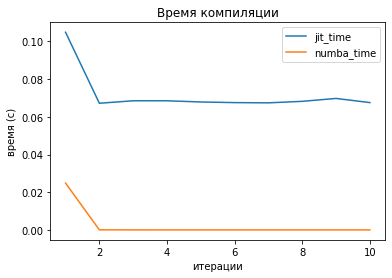

In [9]:
xs = range(1, 11)
plt.plot(xs, jit_time, label='jit_time')
plt.plot(xs, numba_jit_time, label='numba_time')
plt.xlabel('итерации')
plt.ylabel('время (с)')
plt.title('Время компиляции')
plt.legend()
plt.show()

Выводы:
* Компиляция в @numba.jit происходит быстрее в 5 раз
* @numba.jit не выполняет повторную компиляцию модуля, за счёт чего экономит время

## Замеры времени нескольких вызовов

In [18]:
jit_sum = jit(py_sum)
numba_sum = numba.jit(py_sum)

python_exec_time = repeat(lambda: py_sum(2, 2), repeat=10, number=1)
print(python_exec_time)
jit_exec_time = repeat(lambda: jit_sum(2, 2), repeat=10, number=1)
print(jit_exec_time)
numba_exec_time = repeat(lambda: numba_sum(2, 2), repeat=10, number=1)
print(numba_exec_time)

[1.0999992809956893e-06, 3.0000046535860747e-07, 1.9999970390927047e-07, 2.00001522898674e-07, 1.9999970390927047e-07, 1.9999970390927047e-07, 1.9999970390927047e-07, 1.9999970390927047e-07, 1.9999970390927047e-07, 1.9999970390927047e-07]
[8.799999704933725e-06, 3.5000011848751456e-06, 6.999998731771484e-07, 6.000009307172149e-07, 5.000001692678779e-07, 3.099999958067201e-06, 6.000009307172149e-07, 6.000009307172149e-07, 5.999991117278114e-07, 3.4000004234258085e-06]
[0.0278070000003936, 1.6000012692529708e-06, 3.9999940781854093e-07, 3.0000046535860747e-07, 2.999986463692039e-07, 3.0000046535860747e-07, 3.0000046535860747e-07, 2.999986463692039e-07, 1.9999970390927047e-07, 2.999986463692039e-07]


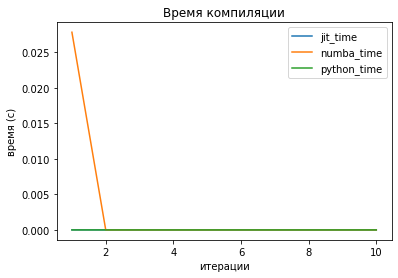

In [19]:
xs = range(1, 11)
plt.plot(xs, jit_exec_time, label='jit_time')
plt.plot(xs, numba_exec_time, label='numba_time')
plt.plot(xs, python_exec_time, label='python_time')
plt.xlabel('итерации')
plt.ylabel('время (с)')
plt.title('Время компиляции')
plt.legend()
plt.show()

Выводы:
* У функции с аннотацией @numba.jit неприлично большое время первого запуска. Видимо, при первом запуске
выполняются некоторые этапы компиляции.

## Усреднённые значения вызовов на простой функции

In [21]:
python_exec_time = repeat(lambda: py_sum(2, 2), repeat=10, number=1000000)
print(python_exec_time)
jit_exec_time = repeat(lambda: jit_sum(2, 2), repeat=10, number=1000000)
print(jit_exec_time)
numba_exec_time = repeat(lambda: numba_sum(2, 2), repeat=10, number=1000000)
print(numba_exec_time)

[0.09964940000099887, 0.09746559999985038, 0.09757530000024417, 0.11475419999987935, 0.09852370000044175, 0.09793330000138667, 0.09810689999903843, 0.09830460000011954, 0.0981813999987935, 0.09803530000135652]
[0.4552733000000444, 0.4556730999993306, 0.45115350000014587, 0.4552925000007235, 0.4540840000008757, 0.45402950000061537, 0.45368729999972857, 0.45339249999960884, 0.4509534999997413, 0.4522581999990507]
[0.16039069999897038, 0.16289049999977578, 0.16913390000081563, 0.15784160000112024, 0.15600979999908304, 0.15615299999990384, 0.15673830000014277, 0.15569560000039928, 0.15780379999887373, 0.15546249999897555]


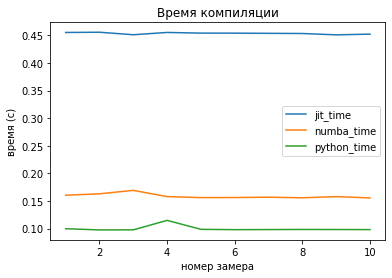

In [23]:
xs = range(1, 11)
plt.plot(xs, jit_exec_time, label='jit_time')
plt.plot(xs, numba_exec_time, label='numba_time')
plt.plot(xs, python_exec_time, label='python_time')
plt.xlabel('номер замера')
plt.ylabel('время (с)')
plt.title('Время компиляции')
plt.legend()
plt.show()

Выводы:
* На простых функциях питон без jit-компиляции выполняется быстрее, чем с ней.
* И всё-таки на простых функциях numba проигрывает Питону в 1,5 раза, а ручная jit аннотация в 4,5.

## Измерение скорости выполнения

### Функция вычисления экспоненты с помощью разложения в ряд Тейлора

In [24]:
def py_exp(x: float) -> float:
    res: float = 0
    threshold: float = 1e-30
    delta: float = 1
    elements: int = 0
    while delta > threshold:
        elements = elements + 1
        delta = delta * x / elements
    while elements >= 0:
        res += delta
        delta = delta * elements / x
        elements -= 1
    return res

jit_exp, numba_exp = get_jit_numba_realisations(py_exp)


In [27]:
arg = 250
print(f"exp({arg}) = {jit_exp(arg):.30f}")
args = range(10, 260, 10)
jit_exp_time, numba_exp_time, python_exp_time = [], [], []
for arg in args:
    jit_exp_time.append(timeit(lambda: jit_exp(arg), number=10000))
    numba_exp_time.append(timeit(lambda: numba_exp(arg), number=10000))
    python_exp_time.append(timeit(lambda: py_exp(arg), number=10000))
print(jit_exp_time)
print(numba_exp_time)
print(python_exp_time)

exp(250) = 3746454614502660877998657881484689260451454624001099543290316630153610787704025897267034669677141296546840576.000000000000000000000000000000
[0.008979000000181259, 0.01180219999878318, 0.013510099999621161, 0.015928899998471024, 0.017869799999971292, 0.019988300000477466, 0.022035600000890554, 0.024103799998556497, 0.026126400000066496, 0.02826459999960207, 0.03024319999894942, 0.03239440000106697, 0.03440749999936088, 0.036484500000369735, 0.03837619999831077, 0.04045629999927769, 0.042554800000289106, 0.044556199998623924, 0.04644960000041465, 0.04866240000046673, 0.05084340000030352, 0.053372599999420345, 0.05549839999912365, 0.05749439999999595, 0.059922399999777554]
[0.08176129999992554, 0.009415099999387166, 0.011677799999233685, 0.013979400000607711, 0.016045099999246304, 0.01819419999992533, 0.02027979999911622, 0.022284399999989546, 0.02432330000010552, 0.02640169999904174, 0.02845329999945534, 0.030491299999994226, 0.03261200000088138, 0.034674499998800457, 0.03672

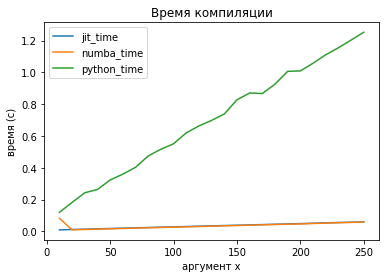

In [28]:
plt.plot(args, jit_exp_time, label='jit_time')
plt.plot(args, numba_exp_time, label='numba_time')
plt.plot(args, python_exp_time, label='python_time')
plt.xlabel('аргумент x')
plt.ylabel('время (с)')
plt.title('Время компиляции')
plt.legend()
plt.show()

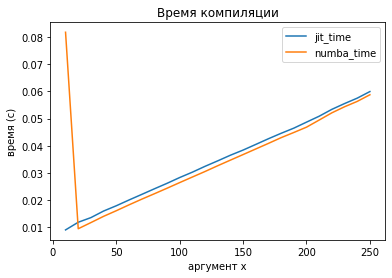

In [29]:
plt.plot(args, jit_exp_time, label='jit_time')
plt.plot(args, numba_exp_time, label='numba_time')
plt.xlabel('аргумент x')
plt.ylabel('время (с)')
plt.title('Время компиляции')
plt.legend()
plt.show()

Выводы:
* Аномалия первого запуска numba функции была обсуждена ранее
* На больших алгоритмических сложностях питон сдаёт позиции
* Отличие производительности двух методов оптимизации незначительно на больших значениях аргумента

### Простая хеш-функция для целых чисел

In [30]:
def py_hash(x: int) -> int:
    x = ((x >> 16) ^ x) * 0x45d9f3b
    x = ((x >> 16) ^ x) * 0x45d9f3b
    x = (x >> 16) ^ x
    return x


jit_hash, numba_hash = get_jit_numba_realisations(py_hash)

In [31]:
python_exec_time = repeat(lambda: py_hash(42), repeat=10, number=1000000)
print(python_exec_time)
jit_exec_time = repeat(lambda: jit_hash(42), repeat=10, number=1000000)
print(jit_exec_time)
numba_exec_time = repeat(lambda: numba_hash(42), repeat=10, number=1000000)
print(numba_exec_time)

[0.34936199999901874, 0.33658319999995, 0.32901870000023337, 0.33346999999957916, 0.32661060000100406, 0.3309752999994089, 0.3268348000001424, 0.32973239999955695, 0.3312222999993537, 0.33012109999981476]
[0.3482729000006657, 0.3414158999985375, 0.34496800000124495, 0.34333149999838497, 0.3414775999990525, 0.3467099999998027, 0.3554037999983848, 0.34962150000137626, 0.34451679999983753, 0.3443785999988904]
[0.18956230000003416, 0.15767280000000028, 0.15518560000055004, 0.1567813000001479, 0.15736029999970924, 0.156203500000629, 0.15520769999966433, 0.15326939999977185, 0.15327550000074552, 0.1542117999997572]


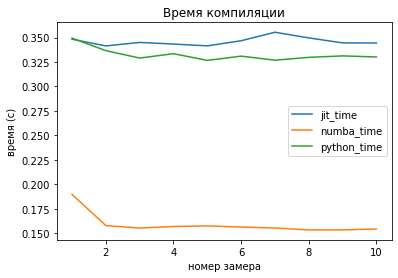

In [32]:
xs = range(1, 11)
plt.plot(xs, jit_exec_time, label='jit_time')
plt.plot(xs, numba_exec_time, label='numba_time')
plt.plot(xs, python_exec_time, label='python_time')
plt.xlabel('номер замера')
plt.ylabel('время (с)')
plt.title('Время компиляции')
plt.legend()
plt.show()

Выводы:
* То что функция @jit работает примерно с такой же скоростью, как и питон, не вызывает вопросов
* Но откуда у numba оптимизация на битовых операциях (?)

### Числа Фибоначчи

In [9]:
def py_fib(n: int) -> int:
    if n < 2:
        return 1
    return py_fib(n - 1) + py_fib(n - 2)

@jit
def jit_fib(n: int) -> int:
    if n < 2:
        return 1
    return jit_fib(n - 1) + jit_fib(n - 2)

@numba.jit(nopython=True)
def numba_fib(n: int) -> int:
    if n < 2:
        return 1
    return numba_fib(n - 1) + numba_fib(n - 2)

In [10]:
arg = 30
print(f"exp({arg}) = {jit_fib(arg)}")
args = range(1, 31)
jit_fib_time, numba_fib_time, python_fib_time = [], [], []
for arg in args:
    jit_fib_time.append(timeit(lambda: jit_fib(arg), number=10))
    numba_fib_time.append(timeit(lambda: numba_fib(arg), number=10))
    python_fib_time.append(timeit(lambda: py_fib(arg), number=10))
print(jit_fib_time)
print(numba_fib_time)
print(python_fib_time)

exp(30) = 1346269
[1.4600000213249587e-05, 9.800000043469481e-06, 4.400000761961564e-06, 4.499999704421498e-06, 4.600000465870835e-06, 4.800000169780105e-06, 4.800000169780105e-06, 4.899999112240039e-06, 5.40000110049732e-06, 5.700001565855928e-06, 6.199999916134402e-06, 7.200000254670158e-06, 9.0000012278324e-06, 1.1500000255182385e-05, 1.449999945180025e-05, 2.4599999960628338e-05, 3.119999928458128e-05, 5.609999971056823e-05, 7.929999992484227e-05, 0.00015770000027259812, 0.00021860000015294645, 0.0003876999999192776, 0.0006909000003361143, 0.0009951000010914868, 0.0014152000003377907, 0.0036009000014018966, 0.00363640000068699, 0.00670669999999518, 0.009275000000343425, 0.015550399999483489]
[0.05328610000105982, 4.600000465870835e-06, 2.4000000848900527e-06, 2.3000011424301192e-06, 2.800001311697997e-06, 2.999999196617864e-06, 3.200000719516538e-06, 3.899998773704283e-06, 4.699999408330768e-06, 6.300000677583739e-06, 8.799999704933725e-06, 1.2700000297627412e-05, 2.239999957964755

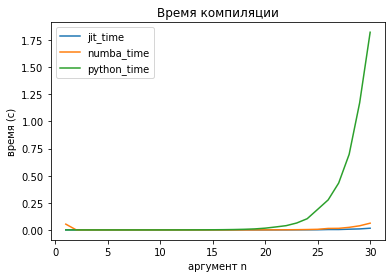

In [11]:
plt.plot(args, jit_fib_time, label='jit_time')
plt.plot(args, numba_fib_time, label='numba_time')
plt.plot(args, python_fib_time, label='python_time')
plt.xlabel('аргумент n')
plt.ylabel('время (с)')
plt.title('Время компиляции')
plt.legend()
plt.show()

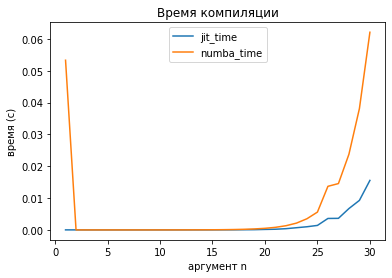

In [12]:
plt.plot(args, jit_fib_time, label='jit_time')
plt.plot(args, numba_fib_time, label='numba_time')
plt.xlabel('аргумент n')
plt.ylabel('время (с)')
plt.title('Время компиляции')
plt.legend()
plt.show()

Выводы:
* На задачах рекурсии реализованный алгоритм показывается себя не так уж и плохо
(до 3-кратного ускорения на данном примере)

### Функция поиска n-го простого числа (наивная реализация)

In [3]:
def py_n_primary(n: int) -> int:
    count: int = 0
    number: int = 2
    while count < n:
        i: int = 2
        is_prime: bool = True
        while i < number:
            if number % i == 0:
                is_prime = False
                break
            i += 1
        if is_prime:
            count += 1
        number += 1
    return number - 1


jit_n_primary, numba_n_primary = get_jit_numba_realisations(py_n_primary)

In [9]:
arg = 1000
print(f"exp({arg}) = {jit_n_primary(arg)}")
args = range(10, 2010, 100)
jit_n_primary_time, numba_n_primary_time, python_n_primary_time = [], [], []
for arg in args:
    jit_n_primary_time.append(timeit(lambda: jit_n_primary(arg), number=1))
    numba_n_primary_time.append(timeit(lambda: numba_n_primary(arg), number=1))
    python_n_primary_time.append(timeit(lambda: py_n_primary(arg), number=1))
print(jit_n_primary_time)
print(numba_n_primary_time)
print(python_n_primary_time)

exp(1000) = 7919
[6.70000008540228e-06, 0.00013890000082028564, 0.0004334999994171085, 0.0010010000005422626, 0.0018368000000918983, 0.002908899999965797, 0.00429939999958151, 0.005999599999995553, 0.007980000000316068, 0.010169600000153878, 0.012865000000601867, 0.015710900001067785, 0.018974200000229757, 0.02242630000000645, 0.026075699999637436, 0.030278500000349595, 0.03476550000050338, 0.0392824999998993, 0.04456890000074054, 0.04947919999904116]
[5.099998816149309e-06, 0.0001067000011971686, 0.0004322000004322035, 0.0009974000004149275, 0.0018493000006856164, 0.0029288000005180947, 0.004322900000261143, 0.006006199999319506, 0.007988600000317092, 0.010288900000887224, 0.012899500001367414, 0.0156154999986029, 0.01899070000035863, 0.022225000000617, 0.025984100000641774, 0.030029100000319886, 0.03438370000003488, 0.03914050000093994, 0.04409450000093784, 0.04949219999980414]
[9.100000170292333e-06, 0.0014651000001322245, 0.0066972000004170695, 0.01563200000055076, 0.03103509999891

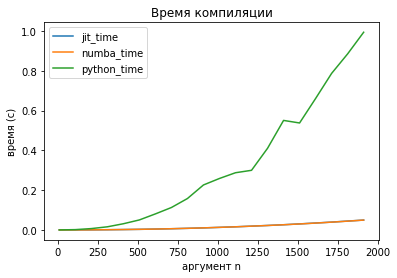

In [10]:
plt.plot(args, jit_n_primary_time, label='jit_time')
plt.plot(args, numba_n_primary_time, label='numba_time')
plt.plot(args, python_n_primary_time, label='python_time')
plt.xlabel('аргумент n')
plt.ylabel('время (с)')
plt.title('Время компиляции')
plt.legend()
plt.show()

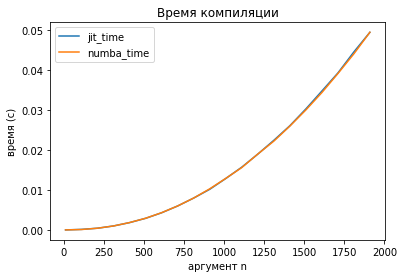

In [11]:
plt.plot(args, jit_n_primary_time, label='jit_time')
plt.plot(args, numba_n_primary_time, label='numba_time')
plt.xlabel('аргумент n')
plt.ylabel('время (с)')
plt.title('Время компиляции')
plt.legend()
plt.show()

Выводы:
* Аналогичны выводам по экспоненте